In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
malware = pd.read_csv('products.csv')
smalware = pd.read_csv('dat2.csv')

/tmp/ipykernel_18099/638102294.py:4: DtypeWarning: Columns (4) have mixed types. Specify dtype option on import or set low_memory=False.
  malware = pd.read_csv('products.csv')


In [2]:
malware.head()

,cve_id,vulnerable_product,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,CVE-2019-16548,google_compute_engine,NaN,NaN,NaN
1,CVE-2019-16547,google_compute_engine,NaN,NaN,NaN
2,CVE-2019-16546,google_compute_engine,NaN,NaN,NaN
3,CVE-2013-2092,dolibarr,NaN,NaN,NaN
4,CVE-2013-2091,dolibarr,NaN,NaN,NaN


In [3]:
apple_prods =  ['apple_tv', 'iphone', 'icloud', 'itunes', 'safari', 'applescript' ,'apple_type_services', 'macos', 'apple_support', 'mac_os_x_server' 'apple_music', 'apple_remote_desktop', 'iphone_os', 'mac_os_x']
apple_malware = malware[malware.vulnerable_product.isin(apple_prods)] #This filters out to just apple products

In [4]:
malist = (apple_malware.to_string()).split()

In [5]:
apple_malware['year'] = apple_malware['cve_id'].apply(lambda s: s.split('-')[1]) #Identify the years of each exploit

/tmp/ipykernel_18099/1040501695.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  apple_malware['year'] = apple_malware['cve_id'].apply(lambda s: s.split('-')[1]) #Identify the years of each exploit


/tmp/ipykernel_18099/3312133731.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  apple_malware['joined'] = apple_malware[apple_malware.columns[1:]].apply(


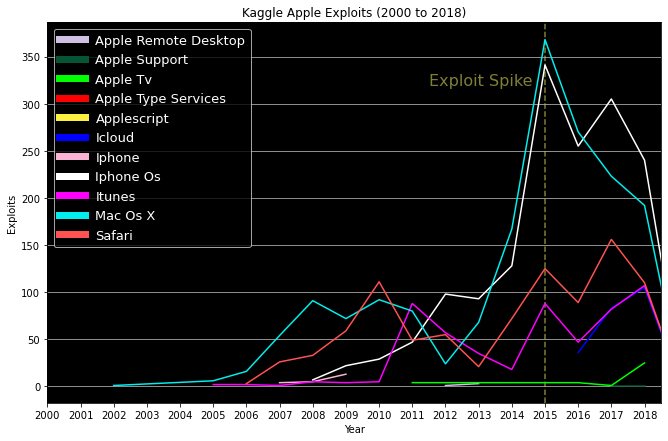

In [6]:
peryear = apple_malware.groupby('year').size()
peryear = peryear.reset_index()
peryear.rename(columns={0 : 'num'}, inplace=True) #Renames column "0" to 'num', makes it easier to use
products = apple_malware.groupby('vulnerable_product').size()
products = products.reset_index()
products.rename(columns={0 : 'exp'}, inplace=True)
try:
    apple_malware.drop('joined', inplace=True, axis=1)
except:
    pass
apple_malware['joined'] = apple_malware[apple_malware.columns[1:]].apply(
    lambda x: '~'.join(x.dropna().astype(str)),
    axis=1
)
prgms = apple_malware.groupby('joined').size()
prgms = prgms.reset_index()
prgms.rename(columns={0 : 'freq'}, inplace=True)
prgms['year'] = prgms['joined'].apply(lambda s: s.split('~')[1])
prgms['joined'] = prgms['joined'].str[:-5]
apple_malware
prgms['year'] = prgms['year'].astype(float) 
df = pd.DataFrame(data=prgms)
program_set = set(df['joined'])
f = plt.figure()
ax = plt.axes()
ax.set_facecolor("Black")
plt.xlim([2000, 2018.5])
color_list = ["#cfbfe5", "#065535", "#00ff00", "red", '#fbf040', "Blue", "#fbb3d5", "#ffffff", '#ff00ff', "#00eeee", "#FF5251"]
col = len(color_list)
ind = 0
ax.set_axisbelow(True)
plt.grid(axis='y', linestyle='-')
program_set = sorted(program_set)
plt.xticks(np.arange(2000, 2018.5, 1)) 
for program in program_set:
    selected_data = df.loc[df['joined'] == program]
    program = program.replace("_", " ")
    program = str.title(program)
    f.set_figwidth(11)
    f.set_figheight(7)
    plt.plot(selected_data['year'], selected_data['freq'], label= program, color = color_list[ind]) #s=90
    ind += 1
plt.axvline(2015, color = "#7e8035", linestyle = "dashed", zorder=-1.0)
plt.text(2011.5, 320, "Exploit Spike", fontsize = 16, color = "#7e8035")
plt.title("Kaggle Apple Exploits (2000 to 2018)")
plt.ylabel('Exploits')
plt.xlabel('Year')
leg = plt.legend(fontsize = 13, labelcolor='white', facecolor='black')
for line in leg.get_lines():
    line.set_linewidth(7)
plt.show()

In [7]:
malyear = pd.read_csv('malyear.csv')
smalware.rename(columns={"#" : 'val'}, inplace=True) #Renames column for easier use

In [8]:
%%javascript
IPython.OutputArea.prototype._should_scroll = function(lines) { //This is a code block that disables scroll
    return false;
}

<IPython.core.display.Javascript object>

# Graphs

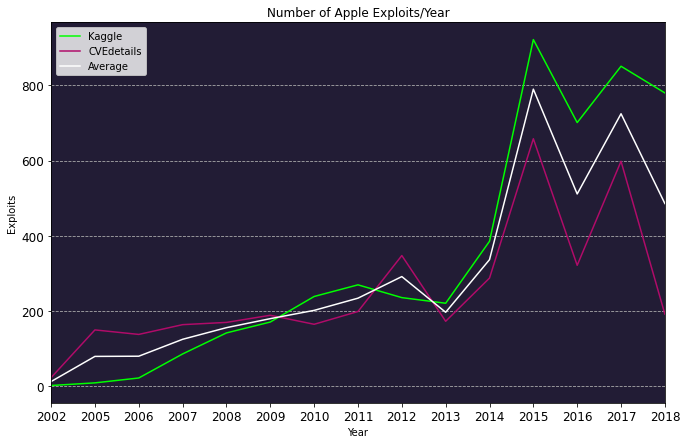

In [9]:
#First Data = https://www.kaggle.com/datasets/andrewkronser/cve-common-vulnerabilities-and-exposures
#Second Data = https://www.cvedetails.com/product/15556/Apple-Iphone-Os.html?vendor_id=49
peryear["year"] = peryear["year"].astype(str)
smalware["year"] = smalware["year"].astype(str)
data = pd.merge(peryear , smalware, on='year')
data = data.drop(data.index[15]) #Remove 2019 since first data set stopped collecting data during the year
f = plt.figure()
f.set_figwidth(11)
f.set_figheight(7)
ax = plt.axes()
ax.set_facecolor("#221C35")
plt.xlim([0, 14])
ax.tick_params(axis='x', labelsize=12)
ax.tick_params(axis='y', labelsize= 12)
plt.plot(data.year, data.num, color = "#00ff00")
plt.plot(data.year, data.val, color = "#b00b69")
sd = (data['num']  + data['val']) / 2 #calculates the average of the two datasets
sd.plot(color = "#ffffff")
plt.grid(axis='y', linestyle='dashed')
plt.title('Number of Apple Exploits/Year')
plt.ylabel('Exploits')
plt.xlabel('Year')
plt.legend(["Kaggle" , "CVEdetails", "Average"])

### The data shows that Apple's Mac OS X, which has 384 security faults, has taken the top spot in terms of publicly known vulnerabilities, closely followed by iOS, which has 375 security defects. In 2015, the company's other products had tens or hundreds of faults that were made public, making it the leading vendor in terms of the number of unique vulnerabilities in 2015. (https://www.securityweek.com/mac-os-x-ios-registered-most-disclosed-vulnerabilities-2015)

In [10]:
df = pd.DataFrame(data.num, data.val)

data['year'] = data['year'].apply(float)

data[['year', 'num', 'val']].corr()

,year,num,val
year,1.000000,0.889370,0.679692
num,0.889370,1.000000,0.810051
val,0.679692,0.810051,1.000000
